In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics
import pandas as pd 
import math
import xgboost as xgb
import matplotlib.pyplot as plt

In [26]:
features_df = pd.read_csv("../data/feature_engineered_dataset.csv")
features_df.set_index(features_df['Date'],inplace=True)
features_df.drop(columns='Date',inplace=True)

In [27]:
y = features_df['crude_price']
X = features_df.drop(['crude_price'],axis=1)
X = X.dropna(how='any')
y = y.dropna(how='any')
X_train = X[:math.floor(len(X)*0.8)]
X_test = X[math.floor(len(X)*0.8):]
y_train = pd.DataFrame(y[:math.floor(len(X)*0.8)])
y_test = pd.DataFrame(y[math.floor(len(X)*0.8):])

In [28]:
# Creating all the models 
regression = LinearRegression()
tree = DecisionTreeRegressor(max_depth=10)
random_forest = RandomForestRegressor(max_depth=500)
sv_regressor = SVR(kernel='poly')
xgb_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)

In [29]:
# Fitting all the models to the data 
regression.fit(X_train, y_train)
tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
sv_regressor.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-rmse:69.82889	validation_1-rmse:66.85321
[100]	validation_0-rmse:26.89591	validation_1-rmse:36.96778
[200]	validation_0-rmse:11.78682	validation_1-rmse:26.38662


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:17:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:7.05491	validation_1-rmse:23.96893
[400]	validation_0-rmse:5.67207	validation_1-rmse:22.90440
[500]	validation_0-rmse:5.04802	validation_1-rmse:22.55661
[600]	validation_0-rmse:4.71479	validation_1-rmse:22.29698
[700]	validation_0-rmse:4.51075	validation_1-rmse:22.01864
[800]	validation_0-rmse:4.33106	validation_1-rmse:21.91626
[900]	validation_0-rmse:4.15812	validation_1-rmse:21.86591
[999]	validation_0-rmse:4.00155	validation_1-rmse:21.85520


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [30]:
# Making predictions with each model
regression_pred = regression.predict(X_test)
tree_pred = tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
sv_regressor_pred = sv_regressor.predict(X_test)
xgb_reg_pred = xgb_reg.predict(X_test)

In [31]:
# Converting the predictions to dataframes to more easily view them
regression_pred = pd.DataFrame(regression_pred)
tree_pred = pd.DataFrame(tree_pred) 
random_forest_pred = pd.DataFrame(random_forest_pred)
sv_regressor_pred = pd.DataFrame(sv_regressor_pred)
xgb_reg_pred = pd.DataFrame(xgb_reg_pred)

In [32]:
# Printing the RMSE values of the models 
print('Linear Regression RMSE: ',round(sklearn.metrics.root_mean_squared_error(y_test, regression_pred),3))
print('Decision Tree RMSE: ',round(sklearn.metrics.root_mean_squared_error(y_test, tree_pred),3))
print('Random Forest RMSE: ',round(sklearn.metrics.root_mean_squared_error(y_test, random_forest_pred),3))
print('Support Vector Regressor RMSE: ',round(sklearn.metrics.root_mean_squared_error(y_test, sv_regressor_pred),3))
print('XGB Regressor RMSE: ',round(sklearn.metrics.root_mean_squared_error(y_test, xgb_reg_pred),3))

Linear Regression RMSE:  33.387
Decision Tree RMSE:  17.664
Random Forest RMSE:  20.352
Support Vector Regressor RMSE:  22.589
XGB Regressor RMSE:  21.848


# Feature Importance 

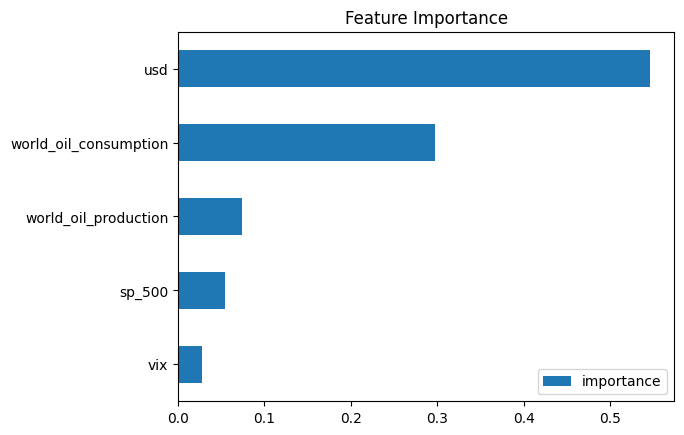

In [9]:
fig = pd.DataFrame(data=xgb_reg.feature_importances_,
             index=xgb_reg.feature_names_in_,
             columns=['importance'])
fig.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

# Conclusions 

The best performing model was the Decision Tree. As seen from the chart above the US dollar had the most significance during the training process for the XGB Regressor. 